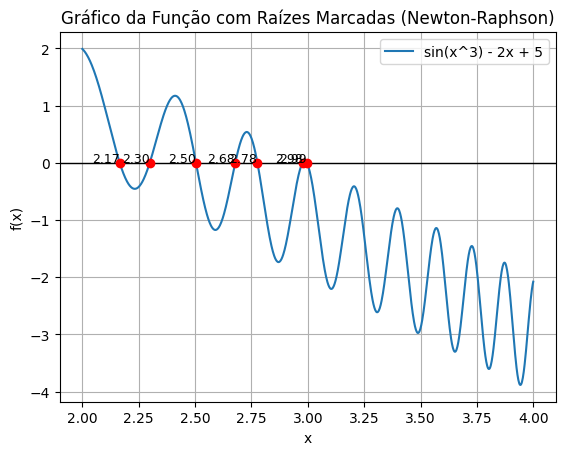

Raízes encontradas no intervalo [-10, 10]: [2.16566 2.29911 2.50399 2.6784  2.77655 2.97777 2.99451]


In [7]:
#Codigo para Resolver a equação (SEN(X3) – 2X +5), e mostrar as raizes no gráfico:

import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return np.sin(x**3) - 2*x + 5

def deriv_func(x):
    return 3*x**2 * np.cos(x**3) - 2

def newton_raphson(func, deriv_func, x0, tol=1e-5, max_iter=1000):
    x = x0
    iters = 0
    while abs(func(x)) > tol and iters < max_iter:
        try:
            x = x - func(x) / deriv_func(x)
        except ZeroDivisionError:
            return None, iters
        iters += 1
    return x if abs(func(x)) <= tol else None, iters

def find_all_roots(func, deriv_func, a, b, num_points=100):
    roots = []
    x_vals = np.linspace(a, b, num_points)
    tol = 1e-5

    for x0 in x_vals:
        root, _ = newton_raphson(func, deriv_func, x0)

        if root is not None and all(abs(root - r) > tol for r in roots):
            roots.append(root)

    return np.unique(np.round(roots, decimals=5))

x_vals = np.linspace(2, 4, 1000) # use a linha de baixo para uma visualização geral do grafico
## x_vals = np.linspace(-10, 10, 1000)
y_vals = func(x_vals)

plt.plot(x_vals, y_vals, label='sin(x^3) - 2x + 5')
plt.axhline(0, color='black', linewidth=1)


a, b = -10, 10
roots = find_all_roots(func, deriv_func, a, b)


for root in roots:
    plt.plot(root, func(root), 'ro')
    plt.text(root, func(root), f'{root:.2f}', fontsize=9, ha='right')

plt.title("Gráfico da Função com Raízes Marcadas (Newton-Raphson)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

print(f"Raízes encontradas no intervalo [-10, 10]: {roots}")


In [13]:
#Codigo para comparar a eficiência no numero de iterações dos metódos de bissecção e de Newton Raphson

import numpy as np

# Definindo a função e sua derivada
def func(x):
    return x**3 - 2*x - 5

def deriv_func(x):
    return 3*x**2 - 2

# Método de Bisseção
def bisection_method(func, a, b, tol=1e-5, max_iter=1000):
    iters = 0
    if func(a) * func(b) >= 0:
        return None, iters  # Retorna None se não houver sinal oposto

    while (b - a) / 2 > tol and iters < max_iter:
        c = (a + b) / 2
        if func(c) == 0:
            return c, iters
        elif func(a) * func(c) < 0:
            b = c
        else:
            a = c
        iters += 1
    return (a + b) / 2, iters

# Método de Newton-Raphson
def newton_raphson(func, deriv_func, x0, tol=1e-5, max_iter=1000):
    x = x0
    iters = 0
    while abs(func(x)) > tol and iters < max_iter:
        try:
            x = x - func(x) / deriv_func(x)
        except ZeroDivisionError:
            return None, iters
        iters += 1
    return x if abs(func(x)) <= tol else None, iters

# Função para comparar os métodos
def compare_methods(func, deriv_func, a, b, x0, tol=1e-5):
    # Método da Bisseção
    bisection_root, bisection_iters = bisection_method(func, a, b, tol)

    # Método de Newton-Raphson
    newton_root, newton_iters = newton_raphson(func, deriv_func, x0, tol)

    # Exibindo os resultados
    print(f"Resultado do Método da Bissecção: {bisection_root} (iterações: {bisection_iters})")
    print(f"Resultado do Método de Newton-Raphson: {newton_root} (iterações: {newton_iters})")

    # Comparando o número de iterações
    if bisection_iters < newton_iters:
        print("\nO Método da Bissecção foi mais eficiente em termos de iterações.")
    elif newton_iters < bisection_iters:
        print("\nO Método de Newton-Raphson foi mais eficiente em termos de iterações.")

# Parâmetros de entrada
a = 2  # Limite inferior para Bisseção
b = 3  # Limite superior para Bisseção
x0 = 2.5  # Aproximação inicial para Newton-Raphson
tol = 1e-5  # Tolerância para ambos os métodos

# Comparando os métodos
compare_methods(func, deriv_func, a, b, x0, tol)


Resultado do Método da Bisseção: 2.0945510864257812 (iterações: 16)
Resultado do Método de Newton-Raphson: 2.094551481550247 (iterações: 4)

O Método de Newton-Raphson foi mais eficiente em termos de iterações.
